Домашнее задание 3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [6]:
class DBSCAN:

    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None
        self.num_clusters = 0

    def fit(self, data):
        n_samples = len(data)
        self.labels = np.full(n_samples, -1)
        cluster_id = 0

        for i in range(n_samples):
            if self.labels[i] != -1:
                continue

            neighbors = self._region_query(data, i)
            if len(neighbors) < self.min_samples:
                self.labels[i] = -1

            else:
                self._expand_cluster(data, i, cluster_id, neighbors)
                cluster_id += 1

        self.num_clusters = cluster_id
        return self

    def _region_query(self, data, point_index):
        neighbors = []
        for i in range(len(data)):
            if np.linalg.norm(data[point_index] - data[i]) < self.eps:
                neighbors.append(i)

        return neighbors

    def _expand_cluster(self, data, point_index, cluster_id, neighbors):
        self.labels[point_index] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_index = neighbors[i]
            if self.labels[neighbor_index] == -1:
                self.labels[neighbor_index] = cluster_id
                new_neighbors = self._region_query(data, neighbor_index)
                if len(new_neighbors) >= self.min_samples:
                    neighbors += new_neighbors

            elif self.labels[neighbor_index] == -2:
                self.labels[neighbor_index] = cluster_id

            i += 1

def generate_data_2d():
    moons_data, _ = make_moons(n_samples=200, noise=0.05, random_state=0)
    blobs1_data, _ = make_blobs(n_samples=100, centers=[[2, 2]], cluster_std=0.3, random_state=0)
    blobs2_data, _ = make_blobs(n_samples=100, centers=[[2, -2]], cluster_std=0.3, random_state=0)
    X = np.concatenate((moons_data, blobs1_data, blobs2_data), axis=0)
    return X

def generate_data_3d():
    X, _ = make_blobs(n_samples=300, centers=[[0, 0, 0], [3, 3, 3]], cluster_std=1.0, random_state=0)
    return X

def visualize_clustering(data, labels, title):
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    plt.figure(figsize=(8, 6))
    for label, color in zip(unique_labels, colors):
        if label == -1:
            color = "black"

        class_member_mask = (labels == label)
        xy = data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color, markeredgecolor='k', markersize=6)

    plt.title(title)
    plt.xlabel("1")
    plt.ylabel("2")
    plt.grid(True)
    plt.show()

def visualize_clustering_3d(data, labels, title):
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for label, color in zip(unique_labels, colors):
        if label == -1:
            color = "black"

        class_member_mask = (labels == label)
        xyz = data[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=color, marker='o', edgecolor='k', s=30)  # Adjusted marker size

    ax.set_title(title)
    ax.set_xlabel("1")
    ax.set_ylabel("2")
    ax.set_zlabel("3")
    ax.grid(True)
    plt.show()

def evaluate_clustering(data, labels, method_name):
    filtered_data = data[labels != -1]
    filtered_labels = labels[labels != -1]
    if len(np.unique(filtered_labels)) < 2:
        print(f"{method_name} не поддерживается")
        return None

    silhouette = silhouette_score(filtered_data, filtered_labels)
    print(f"silhouette_score для метода {method_name}: {silhouette:.4f}")
    return silhouette

def elbow_method(data, max_clusters):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('метода локтя для оптимального числа кластеров')
    plt.xlabel('число кластеров')
    plt.ylabel('WCSS')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

def silhouette_analysis(data, max_clusters):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette анализ для оптимального числа кластеров')
    plt.xlabel('число кластеров')
    plt.ylabel('значение Silhouette')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)
    plt.show()


In [7]:
data_2d = generate_data_2d()
scaler = StandardScaler()
scaled_data_2d = scaler.fit_transform(data_2d)
dbscan_2d = DBSCAN(eps=0.3, min_samples=5)
dbscan_2d.fit(scaled_data_2d)

### 2D

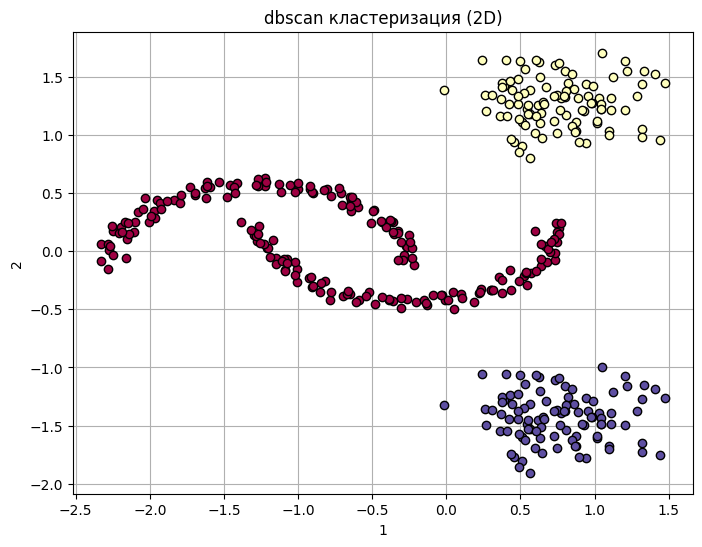

silhouette_score для метода dbscan: 0.5734


np.float64(0.5734069648573721)

In [8]:
visualize_clustering(scaled_data_2d, dbscan_2d.labels, "dbscan кластеризация (2D)")
evaluate_clustering(scaled_data_2d, dbscan_2d.labels, "dbscan")

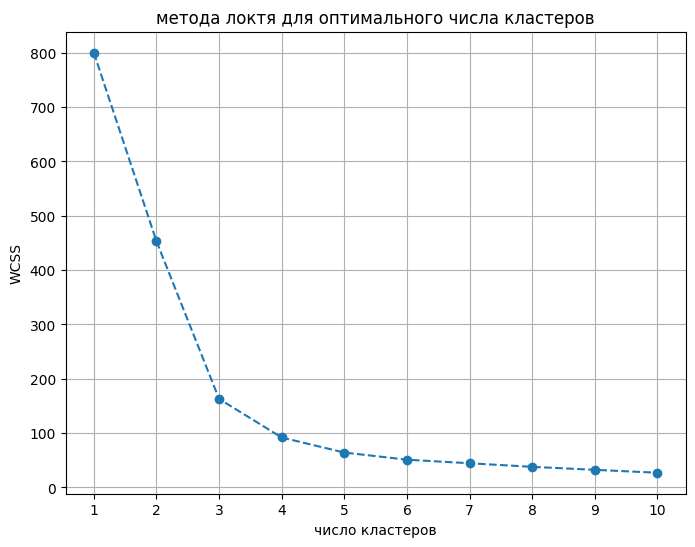

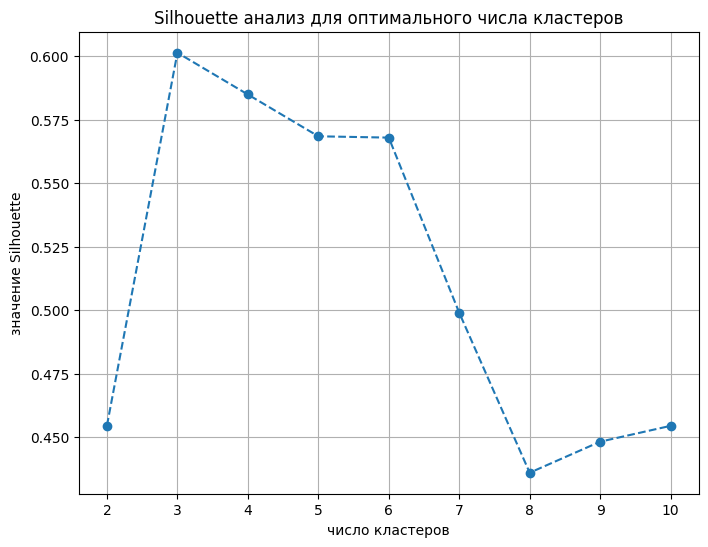

In [9]:
elbow_method(scaled_data_2d, 10)
silhouette_analysis(scaled_data_2d, 10)

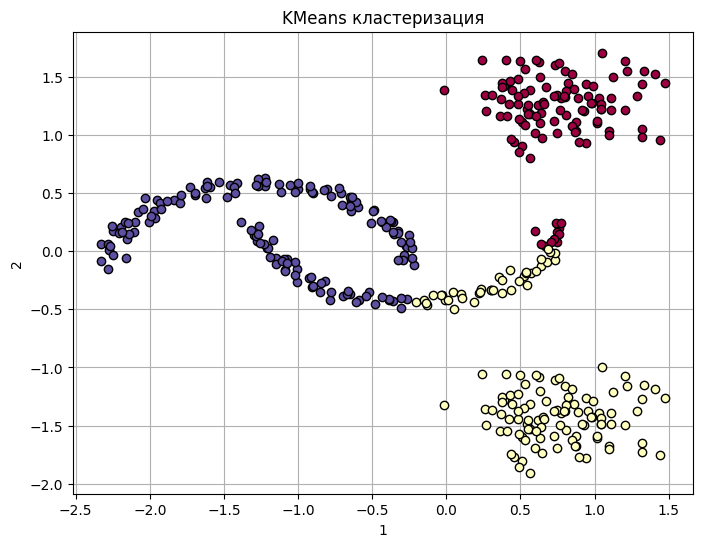

silhouette_score для метода KMeans: 0.6013


np.float64(0.6013176608311512)

In [10]:
kmeans_2d = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans_labels_2d = kmeans_2d.fit_predict(scaled_data_2d)
visualize_clustering(scaled_data_2d, kmeans_labels_2d, "KMeans кластеризация")
evaluate_clustering(scaled_data_2d, kmeans_labels_2d, "KMeans")

### 3D

In [11]:
data_3d = generate_data_3d()
scaler = StandardScaler()
scaled_data_3d = scaler.fit_transform(data_3d)
dbscan_3d = DBSCAN(eps=0.5, min_samples=5)
dbscan_3d.fit(scaled_data_3d)

/var/folders/jn/kvyd5j4j11d0bb2_lypx5crh0000gn/T/ipykernel_56202/1234672041.py:93: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=color, marker='o', edgecolor='k', s=30)  # Adjusted marker size


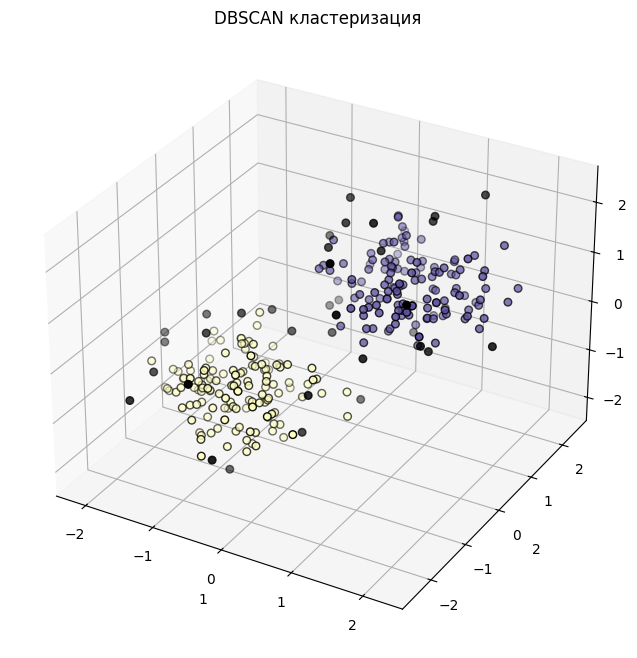

silhouette_score для метода DBSCAN: 0.6209


np.float64(0.6208805494219567)

In [12]:
visualize_clustering_3d(scaled_data_3d, dbscan_3d.labels, "DBSCAN кластеризация")
evaluate_clustering(scaled_data_3d, dbscan_3d.labels, "DBSCAN")

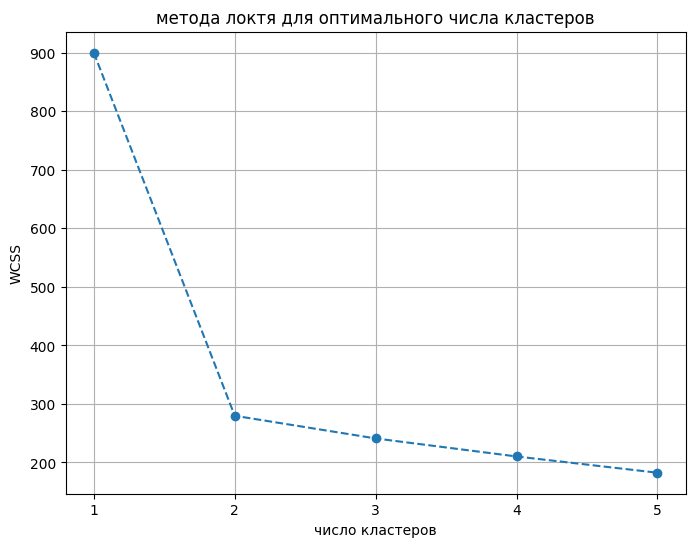

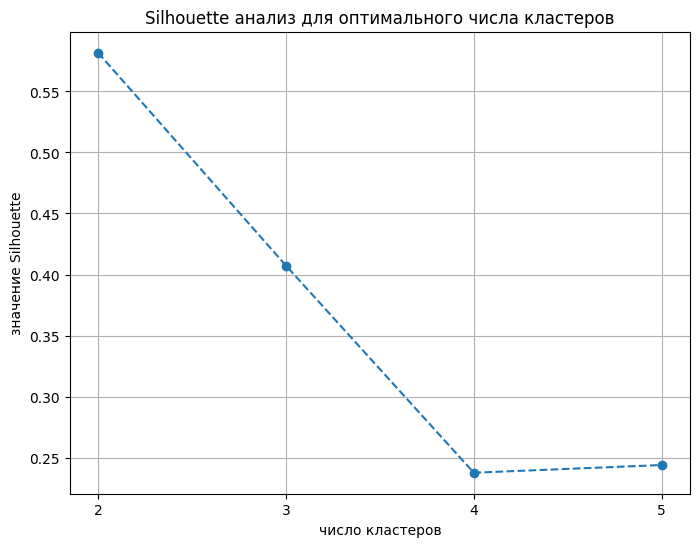

/var/folders/jn/kvyd5j4j11d0bb2_lypx5crh0000gn/T/ipykernel_56202/1234672041.py:93: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=color, marker='o', edgecolor='k', s=30)  # Adjusted marker size


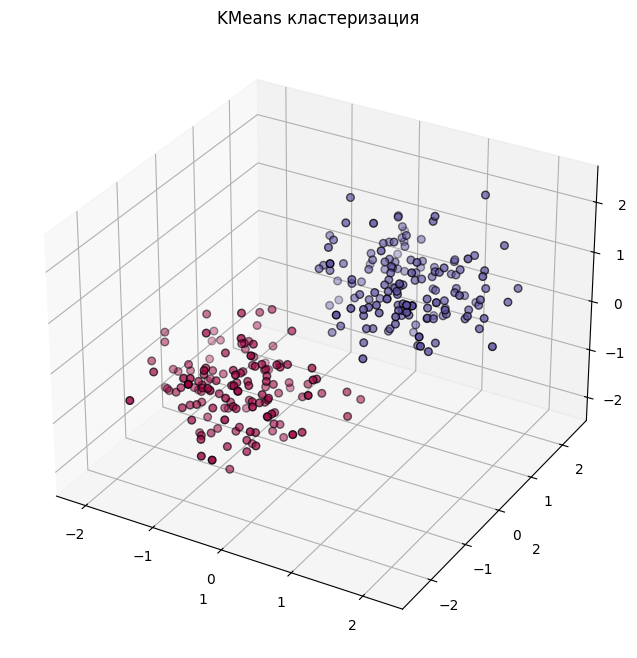

silhouette_score для метода KMeans: 0.5817


np.float64(0.5817042808530684)

In [13]:
elbow_method(scaled_data_3d, 5)
silhouette_analysis(scaled_data_3d, 5)
kmeans_3d = KMeans(n_clusters=2, n_init=10, random_state=0)
kmeans_labels_3d = kmeans_3d.fit_predict(scaled_data_3d)
visualize_clustering_3d(scaled_data_3d, kmeans_labels_3d, "KMeans кластеризация")
evaluate_clustering(scaled_data_3d, kmeans_labels_3d, "KMeans")